In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

ImportError: cannot import name '_gaussian_kernal1d' from 'scipy.ndimage' (/home/adameisen/anaconda3/lib/python3.8/site-packages/scipy/ndimage/__init__.py)

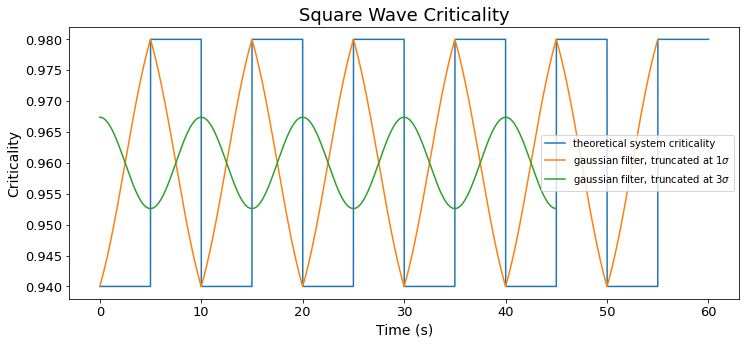

In [85]:
plt.figure(figsize=(12, 5))
dt = 0.001 # s
window = 2.5 # s
t = np.arange(0, 60, dt) # 60 seconds
square_wave = np.ones(t.shape)*0.94
for wave_t in np.arange(5, 60, 10):
    square_wave[int(wave_t/dt):int((wave_t + 5)/dt)] = 0.98
plt.plot(t, square_wave, label='theoretical system criticality')
sigma=int(window/dt)
for truncate in [1, 3]:
#     plt.plot(t, gaussian_filter1d(square_wave, sigma=int(window/dt), truncate=truncate), label=fr'gaussian filter, truncated at {truncate}$\sigma$')
    plt.plot(t[:-(int(sigma*truncate + 0.5)*2 + 1)], gaussian_convolution(square_wave, sigma=sigma, truncate=truncate), label=fr'gaussian filter, truncated at {truncate}$\sigma$')
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Criticality", fontsize=14)
ax = plt.gca()
ax.tick_params(labelsize=13)
plt.legend()
plt.title("Square Wave Criticality", fontsize=18)
plt.show()

In [84]:
def gaussian_convolution(inp, sigma, truncate=4):
    lw = int(truncate * sigma + 0.5)
    kernel = _gaussian_kernel1d(sigma, 0, lw)
    filtered = np.zeros(len(inp) - len(kernel))
    for i in range(len(filtered)):
        filtered[i] = square_wave[i:i + len(kernel)] @ kernel
    
    return filtered